# Linear Regression - Insurance

This notebook aims to analyse the dataset and create a predictive linear regression model to predict the medical cost billed by the health insurance based on various independent variables.

The columns in the dataset include:
- 'age': age of the primary beneficiary
- 'sex': insurance contractor gender
- 'bmi': body mass index
- 'children': number of children covered by health insurance
- 'smoker': whether the primary beneficiary smokes or not
- 'region': the beneficiary's residential area in the US
- 'charges': medical cost

The 'charges' column will be the target feature; whereas, the other columns are the independent variables used to predict the medical cost.

This dataset is obtained from the [Machine-Learning-with-R-datasets][reference-1] on Github.

[reference-1]: https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

## Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
# Ignore warnings

## Dataset reading

In [2]:
raw_data = pd.read_csv("Data/insurance.csv")
# Read the dataset into a Pandas dataframe

raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
raw_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data visualisation

The following plot is the distribution plot of the charges. The distribution plot can help to identify outliers and skewness. On top of the distribution plot, the kernel density estimation is plotted as a smoothed view of the distribution.

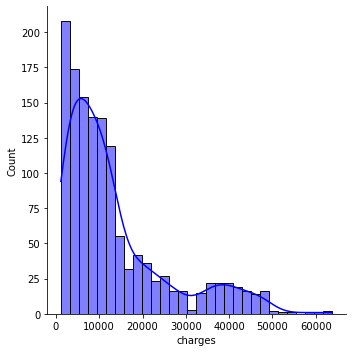

In [5]:
sns.displot(raw_data["charges"], kde=True, color="b")

From the distribution plot, it can be seen that the dataset is right-skewed. This could be due to the minimum medical cost for seeking treatments. 

A bar plot is plotted with 'region' on the x-axis and 'charges' on the y-axis. This plot helps to compare the variation of medical costs in different regions. The hue is set to 'smoker' to further point out the relationship between smoking and medical costs.

<AxesSubplot:xlabel='region', ylabel='charges'>

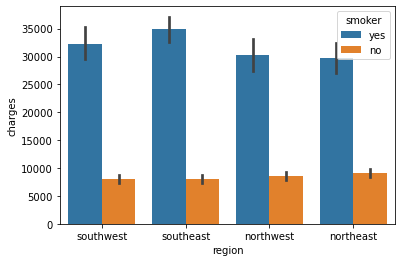

In [6]:
sns.barplot(x="region", y="charges", hue="smoker", data=raw_data)

South east region has the highest charges and north east region has the lowest charges as presented in the bar plot. Despite the difference in medical costs, the medical costs for people who do not smoke are approximately the same in all regions. The medical costs for smokers are considerably more than that for non-smokers, and the difference in prices also vary more between regions.

The same bar plot is produced again; however, with the hue set to 'gender'. This plot helps to compare the medical costs billed to male and female beneficiaries, with the charges primarily separated by regions.

<AxesSubplot:xlabel='region', ylabel='charges'>

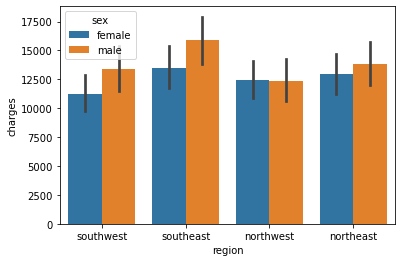

In [7]:
sns.barplot(x="region", y="charges", hue="sex", data=raw_data)

From the bar plot plot above it can be observed that male and female beneficiaries are billed similar medical costs, except in the southern regions where male beneficiaries tend to be billed more on medical expenses.

Alternatively, a cat plot can be used to visualise categorical data. The following cat plot has 'smoker' on the x-axis and 'charges' on the y-axis. It also has the hue set to 'sex'.

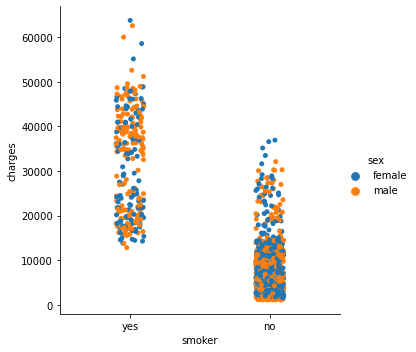

In [8]:
sns.catplot(x="smoker", y="charges", hue="sex", data=raw_data)

From the cat plot above it can be seen that there is an insignificant difference between the medical charges of male and female beneficiaries; however, the plots for smokers lie higher on the y-axis, representing higher medical charges.

The numeric variables 'age' and 'bmi' require visualisation and they can be visualised using scatter plots. The following scatter plot has 'age' on the x-axis and 'charges' on the y-axis, with the hue set to 'smoker'.

<AxesSubplot:xlabel='age', ylabel='charges'>

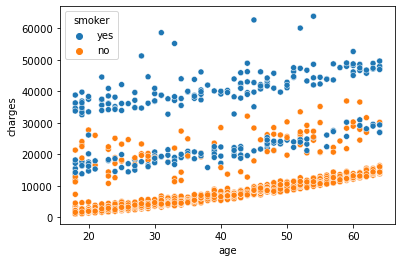

In [9]:
sns.scatterplot(x="age", y="charges", hue="smoker", data=raw_data)

It can be observed from the scatter plot that there is a generally positive correlation between 'age' and 'charges' for non-smokers, although some plots lie above the general trend line. On the other hand, there is no particularly strong trend lines for plots representing smokers, and the plots for smokers lie higher on the y-axis, representing greater medical expenses.

Besides scatter plots, linear model plots can also be used to visualise numeric data. Linear model plots are similar to scatter plots, but they represent the trend with regression lines. The following linear model plot has 'bmi' on the x-axis and 'charges' on the y-axis. It also has hue set to 'smoker'.

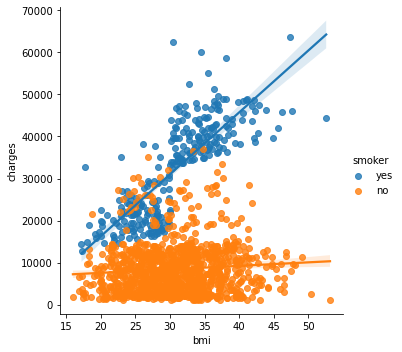

In [10]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=raw_data)

It is seen that there is weak or no correlation between 'bmi' and 'charges' for non-smokers from the orange linear model regression line. However, the blue regression line representing smokers shows a positive correlation between 'bmi' and 'charges' in smokers.

The numeric variable 'children' is visualised with a linear model plot since the numbers represent more than categories but the number of dependents (children associated to the health insurance).

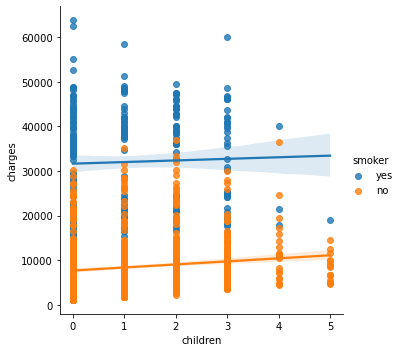

In [11]:
sns.lmplot(x="children", y="charges", hue="smoker", data=raw_data)

From the linear model plot of discrete children counts and charges, it can be interpretted that smokers are billed more than non-smokers on medical expenses and there are weak positive correlations between charges and the number of dependent children.

The next plot is a heatmap plotted using the Pearson correlation coefficients between all variables. The coloured plot can help identify correlations between variables which could mean multicollinearity.

<AxesSubplot:>

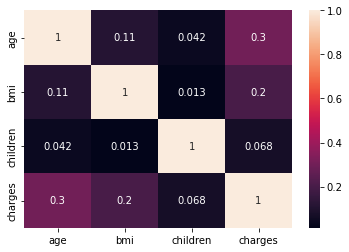

In [12]:
sns.heatmap(raw_data.corr(), annot=True)

With the correlation coefficients displayed on the heatmap, no strong correlations can be observed between numeric variables.

## Data processing

There are numerous fields in this dataset which do not contain numeric data and a linear regression model can not operate with non-numeric data. Therefore, these data have to be processed and converted into numeric data before training the linear regression model.

Categorical data like 'sex', 'smoker', 'children' and 'region' can be turn into numeric data with encoding. There are several encoding methods that can be used:
- One hot encoding
- Label encoding
- Dummy encoding
- Ordinal encoding

Ordinal encoding is used for categories with orders. The only ordinal data in this dataset is the number of children covered by health insurance and they do not need to be processed/encoded since they are represented in numbers by default.

Categorical data can be encoded with one hot encoding but it introduces an extra column for each category in the field and it maybe lead to inaccuracies by introducing 0s. However, 'sex' will be encoded using one hot encoding for simplicity.

'smoker' will be encoded using dummy encoding since dummy encoding introduces one extra column for each category except for one, which in this case one extra column will be added and a 1 represents smokers and 0 represents non-smoker.

Finally, 'region' will be encoded using label encoding which does not introduce new columns but assign a numeric value to each category instead. With four categories under 'region', one hot encoding would introduce 4 columns and dummy encoding 3 columns.

In [13]:
raw_data["smoker"] = pd.get_dummies(raw_data["smoker"])["yes"]

raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [14]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

label.fit(raw_data["region"].drop_duplicates())

raw_data["region"] = label.transform(raw_data["region"])

raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,3,16884.92400
1,18,male,33.770,1,0,2,1725.55230
2,28,male,33.000,3,0,2,4449.46200
3,33,male,22.705,0,0,1,21984.47061
4,32,male,28.880,0,0,1,3866.85520


In [15]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()

one_hot.fit([[i] for i in raw_data["sex"].drop_duplicates()])

sex = pd.DataFrame(one_hot.transform([[i] for i in raw_data["sex"]]).toarray(), columns=["female", "male"])

sex[["female"]] = sex[["female"]].astype(int)
sex[["male"]] = sex[["male"]].astype(int)

data = raw_data.join(sex).drop(["sex"], 1)

data.head()

,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,1,3,16884.92400,1,0
1,18,33.770,1,0,2,1725.55230,0,1
2,28,33.000,3,0,2,4449.46200,0,1
3,33,22.705,0,0,1,21984.47061,0,1
4,32,28.880,0,0,1,3866.85520,0,1


Categorical columns are turned into numeric data and a heat map can be plotted again to investigate the correlations between variables.

<AxesSubplot:>

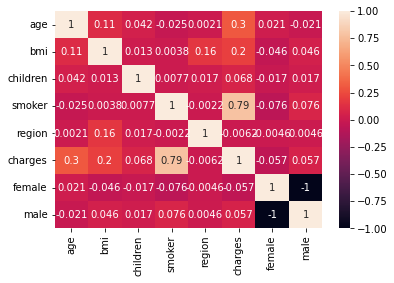

In [16]:
sns.heatmap(data.corr(), annot=True)

It is observed that smoking has a positive correlation with medical charges as seen earlier in other plots. There is also a perfect negative correlation between female and male since they are the products of one hot encoding and there are only two categories.

## Linear model

Before the model can be trained, the dataset needs to be split into training and testing data so the model is trained and evaluated using different sets of data.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

predict = "charges"

x = data.drop([predict], 1)
y = data[predict]

x_train, x_test, y_train, x_test = train_test_split(x, y, test_size=0.2)

In [18]:
linear = LinearRegression()